In [0]:
import pandas as pd
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
final=pd.read_csv('/content/drive/My Drive/final_dataset.csv')

In [40]:
final.head(2)

,Unnamed: 0,Season_Year,day,month,winner,Chennai Super Kings:Delhi Daredevils,Chennai Super Kings:Kings XI Punjab,Chennai Super Kings:Kolkata Knight Riders,Chennai Super Kings:Mumbai Indians,Chennai Super Kings:Rajasthan Royals,Chennai Super Kings:Royal Challengers Bangalore,Chennai Super Kings:Sunrisers Hyderabad,Delhi Daredevils:Chennai Super Kings,Delhi Daredevils:Kings XI Punjab,Delhi Daredevils:Kolkata Knight Riders,Delhi Daredevils:Mumbai Indians,Delhi Daredevils:Rajasthan Royals,Delhi Daredevils:Royal Challengers Bangalore,Delhi Daredevils:Sunrisers Hyderabad,Kings XI Punjab:Chennai Super Kings,Kings XI Punjab:Delhi Daredevils,Kings XI Punjab:Kolkata Knight Riders,Kings XI Punjab:Mumbai Indians,Kings XI Punjab:Rajasthan Royals,Kings XI Punjab:Royal Challengers Bangalore,Kings XI Punjab:Sunrisers Hyderabad,Kolkata Knight Riders:Chennai Super Kings,Kolkata Knight Riders:Delhi Daredevils,Kolkata Knight Riders:Kings XI Punjab,Kolkata Knight Riders:Mumbai Indians,Kolkata Knight Riders:Rajasthan Royals,Kolkata Knight Riders:Royal Challengers Bangalore,Kolkata Knight Riders:Sunrisers Hyderabad,Mumbai Indians:Chennai Super Kings,Mumbai Indians:Delhi Daredevils,Mumbai Indians:Kings XI Punjab,Mumbai Indians:Kolkata Knight Riders,Mumbai Indians:Rajasthan Royals,Mumbai Indians:Royal Challengers Bangalore,Mumbai Indians:Sunrisers Hyderabad,...,m,n,o,p,q,r,s,t,u,v,Abu Dhabi,Ahmedabad,Bengaluru,Bloemfontein,Cape Town,Centurion,Chandigarh,Chennai,Cuttack,Delhi,Dharamsala,Durban,East London,Hyderabad,Indore,Jaipur,Johannesburg,Kanpur,Kimberley,Kochi,Kolkata,Mohali,Mumbai,Nagpur,Port Elizabeth,Pune,Raipur,Rajkot,Ranchi,Visakhapatnam
0,0,2008.0,18.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,2008.0,19.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
final.drop(columns=['Unnamed: 0'],inplace=True)

In [0]:
from sklearn.model_selection import train_test_split
def datasplitter(data):
    train_data, val_data = train_test_split(data, test_size = 0.2, random_state = 2)
    y_train = train_data['winner'].values
    y_val = val_data['winner'].values
    x_train = train_data.drop(['winner'], axis = 1).values
    x_val = val_data.drop(['winner'], axis = 1).values
    return y_train,y_val,x_train,x_val


y_train,y_val,x_train,x_val=datasplitter(final)


In [48]:
import tensorflow as tf
from keras import models
from keras import layers
from keras.layers import Dropout
model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(133,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

from keras import optimizers

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(x_train,y_train,epochs=17,batch_size=100,validation_data=(x_val, y_val))

Train on 415 samples, validate on 104 samples
Epoch 1/17
415/415 [==============================] - 1s 3ms/step - loss: 3.8442 - acc: 0.4819 - val_loss: 2.9195 - val_acc: 0.5288
Epoch 2/17
415/415 [==============================] - 0s 34us/step - loss: 1.7880 - acc: 0.5373 - val_loss: 1.4997 - val_acc: 0.4712
Epoch 3/17
415/415 [==============================] - 0s 31us/step - loss: 1.5196 - acc: 0.4916 - val_loss: 1.1821 - val_acc: 0.5288
Epoch 4/17
415/415 [==============================] - 0s 27us/step - loss: 1.1272 - acc: 0.4867 - val_loss: 0.6755 - val_acc: 0.5673
Epoch 5/17
415/415 [==============================] - 0s 28us/step - loss: 1.0039 - acc: 0.5494 - val_loss: 0.6946 - val_acc: 0.5673
Epoch 6/17
415/415 [==============================] - 0s 29us/step - loss: 0.9791 - acc: 0.4434 - val_loss: 0.9774 - val_acc: 0.5288
Epoch 7/17
415/415 [==============================] - 0s 26us/step - loss: 0.8876 - acc: 0.5060 - val_loss: 0.7548 - val_acc: 0.5288
Epoch 8/17
415/415 [====

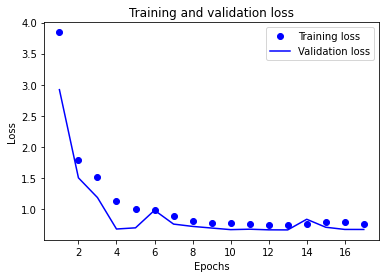

In [49]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [9]:
import xgboost as xgb
from xgboost import XGBClassifier
model=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.05, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)
model.fit(x_train, y_train)
y_pred=model.predict(x_val)
from sklearn.metrics import accuracy_score
accuracy_score(y_val, y_pred)


0.4423076923076923

In [0]:
param = {}
param['booster'] = 'gbtree'
param['objective'] = 'binary:logistic'
param["eval_metric"] = "error"
param['eta'] = 0.3
param['gamma'] = 0
param['max_depth'] = 6
param['min_child_weight']=1
param['max_delta_step'] = 0
param['subsample']= 1
param['colsample_bytree']=1
param['silent'] = 1
param['seed'] = 0
param['base_score'] = 0.5

In [0]:
def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    from sklearn.model_selection import ShuffleSplit

    cv_sets = ShuffleSplit(n_splits = 10, test_size = 0.20, random_state = 0)

    # TODO: Create a decision tree regressor object
    regressor1=xgb.XGBClassifier()

    # TODO: Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = {'learning_rate':[0.01,0.05,0.1],'max_depth':[3,5,7,9]}
    
    # TODO: Transform 'performance_metric' into a scoring function using 'make_scorer' 
    from sklearn.metrics import accuracy_score
    from sklearn.metrics import make_scorer
    scoring_fnc = make_scorer(accuracy_score, greater_is_better=True)


    # TODO: Create the grid search cv object --> GridSearchCV()
    # Make sure to include the right parameters in the object:
    # (estimator, param_grid, scoring, cv) which have values 'regressor', 'params', 'scoring_fnc', and 'cv_sets' respectively.
    from sklearn.model_selection import GridSearchCV
    grid = GridSearchCV(estimator=regressor1,param_grid=params,scoring=scoring_fnc,cv=cv_sets)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_



In [12]:
fit_model(final.drop(columns=['winner']).values,final['winner'].values)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.05, max_delta_step=0, max_depth=7,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)